### Cost Benefit Questions

1. How would you rephrase the business problem if your model was optimizing toward _precision_? i.e., How might the model behave differently, and what effect would it have?
2. How would you rephrase the business problem if your model was optimizing toward _recall_?
3. What would the most ideal model look like in this case?

Answers:

1. If this model where optimized toward precision, we'd be minimizing the number of false positives: users who are targeted in the campaign but are not retained.
2. If this model where optimized toward recall, we'd be minimizing the number of false negatives, or making sure that users who could have retained, did.
3. The model would be most optimized, at this point, towards recall, as there's the largest business gain.

### Visualizing models over variables

In [1]:
import pandas as pd
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

raw_df = pd.read_csv('../assets/dataset/flight_delays.csv')
print( "raw_df shape:", raw_df.shape)

# shape (469968, 16) - 16 columns

('raw_df shape:', (469968, 16))


In [2]:
#check for null values 
raw_df.isnull().sum().sort_values(ascending=False)

# see some weird unnamed column and two other columns with 11+ missing rows

Unnamed: 15              469968
DEP_DEL15                 11657
DEP_TIME                  11657
CRS_DEP_TIME                  0
DEST_CITY_MARKET_ID           0
DEST_AIRPORT_SEQ_ID           0
DEST_AIRPORT_ID               0
ORIGIN_CITY_MARKET_ID         0
ORIGIN_AIRPORT_SEQ_ID         0
ORIGIN_AIRPORT_ID             0
CARRIER                       0
AIRLINE_ID                    0
UNIQUE_CARRIER                0
FL_DATE                       0
DAY_OF_WEEK                   0
DAY_OF_MONTH                  0
dtype: int64

## Let's get rid of some null values!:
* DEP_TIME and DEP_DEL15 have 11,657 missing values
* Instead of dropping the null rows, we can just filter them out and save the filtered results to a new dataframe:df

In [3]:
# The copy below chained to .notnull() makes a copy of the dataframe filtered to the non-null rows of raw_df:
print("raw_df shape: {}".format(raw_df.shape))
# only filtering out DEP_DEL15 because turns out there's a 1:1 match for DEP_TIME and DEP_DEL15 rows 
df = raw_df.loc[raw_df.DEP_DEL15.notnull()].copy()
print("df shape:     {}".format(df.shape))

raw_df shape: (469968, 16)
df shape:     (458311, 16)


* `"Unnamed: 15 "` still has 458,311 null values that we need to address.

## Fun with dataframe filtering!
* Here are some good filtering tricks that you want learn to use in different, tricky situations

### 1. Quick check for nulls without seeing all the columns that have zero null values (good for data with tons of features):

In [4]:
# Filter the dataframe to output any columns where null counts not equal to zero
df.isnull().sum()[df.isnull().sum() != 0]

Unnamed: 15    458311
dtype: int64

### 2. An alternative way of dropping columns instead of using `df.drop()` - filter by column name using `'~'` :
* `.loc[:, cols]` is the basic syntax we're after, with ':' referring to 'all rows'
* `~df.columns.str.contains('^Unnamed')` is a boolean for all columns that don't mean the criteria given
* `str.contains('^Unnamed')` is an expression from the 'regex' world that we'll use in natural language processing.

In [5]:
# Assign to df all rows in df but just the columns that do not contain "Unnamed" in the column name:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

Check to make sure the dataframe was filtered correclty: df

In [8]:
# confirm that the weird Unnamed column is no longer in the df
print('Unnamed: 15' in df.columns)

False


In [9]:
# checking same way as Step 1 above
df.isnull().sum()[df.isnull().sum() != 0]

Series([], dtype: int64)

In [7]:
df.isnull().sum()

DAY_OF_MONTH             0
DAY_OF_WEEK              0
FL_DATE                  0
UNIQUE_CARRIER           0
AIRLINE_ID               0
CARRIER                  0
ORIGIN_AIRPORT_ID        0
ORIGIN_AIRPORT_SEQ_ID    0
ORIGIN_CITY_MARKET_ID    0
DEST_AIRPORT_ID          0
DEST_AIRPORT_SEQ_ID      0
DEST_CITY_MARKET_ID      0
CRS_DEP_TIME             0
DEP_TIME                 0
DEP_DEL15                0
dtype: int64

In [10]:
df.head(3)

,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,CRS_DEP_TIME,DEP_TIME,DEP_DEL15
0,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,1289203,32575,900,855.0,0.0
1,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,1247802,31703,900,856.0,0.0
2,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,1289203,32575,1230,1226.0,0.0


### Let's look at our data types:
* We know we have no nulls now, but how many categorical / numeric columns do we have?
* Are the object columns categorical or just strings? How would you check that?

In [11]:
# Check the numbers of columns of each data type in your dataframe:
raw_df.dtypes.value_counts()

int64      10
float64     3
object      3
dtype: int64

In [12]:
# Remember you can always check the same info using '.info()'
# wonder what the difference is between `Carrier` and `Unique_Carrier` 
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469968 entries, 0 to 469967
Data columns (total 16 columns):
DAY_OF_MONTH             469968 non-null int64
DAY_OF_WEEK              469968 non-null int64
FL_DATE                  469968 non-null object
UNIQUE_CARRIER           469968 non-null object
AIRLINE_ID               469968 non-null int64
CARRIER                  469968 non-null object
ORIGIN_AIRPORT_ID        469968 non-null int64
ORIGIN_AIRPORT_SEQ_ID    469968 non-null int64
ORIGIN_CITY_MARKET_ID    469968 non-null int64
DEST_AIRPORT_ID          469968 non-null int64
DEST_AIRPORT_SEQ_ID      469968 non-null int64
DEST_CITY_MARKET_ID      469968 non-null int64
CRS_DEP_TIME             469968 non-null int64
DEP_TIME                 458311 non-null float64
DEP_DEL15                458311 non-null float64
Unnamed: 15              0 non-null float64
dtypes: float64(3), int64(10), object(3)
memory usage: 57.4+ MB


### 3. You can filter through the columns to look at just the ones that contain strings: `dtypes == 'object'`

In [13]:
raw_df.columns[raw_df.dtypes == 'object']

Index([u'FL_DATE', u'UNIQUE_CARRIER', u'CARRIER'], dtype='object')

### 4. Let's also look at the mins and max to see if there are numeric categorical features: `.describe()`

In [14]:
df.describe()

# check out mins and maxes
# figure out if there are categorical features (see columns with objects)

,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,CRS_DEP_TIME,DEP_TIME,DEP_DEL15
count,458311.000000,458311.000000,458311.000000,458311.000000,4.583110e+05,458311.000000,458311.000000,4.583110e+05,458311.000000,458311.000000,458311.000000,458311.000000
mean,15.803053,4.048024,19977.381106,12671.392175,1.267142e+06,31714.487246,12671.782322,1.267181e+06,31715.865238,1323.662952,1333.028542,0.198507
std,8.921022,1.929048,399.158330,1519.173651,1.519171e+05,1286.064137,1519.250986,1.519248e+05,1286.731887,467.693510,479.639617,0.398876
min,1.000000,1.000000,19393.000000,10135.000000,1.013503e+06,30070.000000,10135.000000,1.013503e+06,30070.000000,5.000000,1.000000,0.000000
25%,8.000000,2.000000,19790.000000,11292.000000,1.129202e+06,30615.000000,11292.000000,1.129202e+06,30615.000000,925.000000,930.000000,0.000000
50%,16.000000,4.000000,19977.000000,12889.000000,1.288903e+06,31453.000000,12889.000000,1.288903e+06,31453.000000,1320.000000,1328.000000,0.000000
75%,23.000000,6.000000,20366.000000,13930.000000,1.393003e+06,32467.000000,13930.000000,1.393003e+06,32467.000000,1720.000000,1729.000000,0.000000
max,31.000000,7.000000,21171.000000,16218.000000,1.621801e+06,35991.000000,16218.000000,1.621801e+06,35991.000000,2359.000000,2400.000000,1.000000


#### Day of month, day of week are also categorical (of course they are!)
* So our categorical variables/features are:
 - `FL_DATE', 'UNIQUE_CARRIER', 'CARRIER`
 - `DAY_OF_WEEK', 'DAY_OF_MONTH`

#### A categorical variable is a variable that can take on one of a limited, and usually fixed, number of possible values


### 5. Let's transform some of our categorical features into dummies using `pd.get_dummies()`:
* `CARRIER`
* `DAY_OF_WEEK`

In [15]:
# Creating dummy variables for 'carrier' and 'day_of_week'
df = df.join(pd.get_dummies(df['CARRIER'], prefix='carrier'))
df = df.join(pd.get_dummies(df['DAY_OF_WEEK'], prefix='dow'))

## CREATE A LOGISTIC REGRESSION MODEL

### 6. Instantiate the model and identify feature columns

In [16]:
# Instantiate your LogisticRegression model object that is already imported up top: lm.LogisticRegression
logreg = lm.LogisticRegression()

# Select Feature Columns of interest : a list of dummy variables from the 'DAY_OF_WEEK' column that we named 'dow_'...:
    # List comprehension uses conditional language "if 'stringA' in 'stringB' " VERY USEFUL
features = [i for i in df.columns if 'dow_' in i]

In [17]:
# See the result of our list comprehension:
features

['dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6', 'dow_7']

### 7. Now, let's add 'CRS_DEP_TIME' to this features list once. If you run the cell more than once, it will add it again and again, so only run it once!

In [18]:
# Use the '+=' method to add the column name, which basically means: features = features + ['CRS_DEP_TIME']
# BE CAREFUL to run this only once or the "+=' will add another 'CRS_DEP_TIME' for each time you run this code cell

### RUN ONLY ONCE 
### RUN ONLY ONCE 



features += ['CRS_DEP_TIME']
print(features)



### RUN ONLY ONCE 
### RUN ONLY ONCE 

['dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6', 'dow_7', 'CRS_DEP_TIME']


In [19]:
# What is 'CRS_DEP_TIME'?
# Departure times in military time
print(df['CRS_DEP_TIME'].describe())

# Min = 5 minutes after midnight
# Max = 1 minutes before midnight
# Median flight time = 1:20 in the afternoon

count    458311.000000
mean       1323.662952
std         467.693510
min           5.000000
25%         925.000000
50%        1320.000000
75%        1720.000000
max        2359.000000
Name: CRS_DEP_TIME, dtype: float64


####  When we fit our model, we will use the slice method to filter out the 'dow_1' dummy and avoid the dummy collinearity debacle:

In [24]:
feature_set = features[1:]

### 8. Fit the model on the sliced features and use 'DEP_DEL15' as the target (outcome):
* #### Note: `"DEP_DEL15"` is _departure delays over 15 minutes_
* You can either:
    - set X and y first and fit the model to X,y: logreg.fit(X,y), or
    - fit the model to the slices directly (be careful!)


In [31]:
# Quick check of what's inside your target variable

# 90K+ delayed flights?!
print(df['DEP_DEL15'].value_counts())

# Almost 20%?!
# put into percentage terms 
df['DEP_DEL15'].value_counts(normalize=True)*100

0.0    367333
1.0     90978
Name: DEP_DEL15, dtype: int64


0.0    80.149287
1.0    19.850713
Name: DEP_DEL15, dtype: float64

In [27]:
# First option 
# X = df[features[1:]] <-- dropped the dummy dow_1 to avoid multicolinearity 
# y = df['DEP_DEL15']

# no need for intercept because it's Logistic Regression not statsmodel (where you do need an intercept)
# did not split data into train and test


# Second option - fit the model to the slices directly
logreg.fit(df[features[1:]], df['DEP_DEL15'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### 9. We want to create a column of predicted probabilities and add it to our dataframe.
* The LogisticRegression() model has a method called `.predict_proba()` that outputs the predicted probabilties for each row in the sample having target == 0,1  (probability that the flight will be delayed 15 minutes or more)
* Remember that  `.predict_proba()` actually outputs **two columns**, and we want the second one (probability of being true): 
    - `[Probability of being false y==0, Probability of being true y==1]`
    

* So we're going to access the second column using the `[1]` slice of the transposed column of predicted probabilities (love those chaining methods!)

* The `.T` is how we transpose our dataframe from being an array to a column, which we need if we're going to add it to our dataframe.

In [30]:
# Creating predicted probabilites as assigning back to df as "probability"
df['probability'] = logreg.predict_proba(df[features[1:]]).T[1]

In [31]:
# find the predictions
y = df['DEP_DEL15']
x = df[features[1:]]

y_preds = logreg.predict(df[features[1:]])
print('Actual mean of y', y.mean())
print ('Our prediction of the mean of y', y_preds.mean())

('Actual mean of y', 0.19850712725638267)
('Our prediction of the mean of y', 0.0)


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score

accuracy = accuracy_score(y, y_preds)
print ('My accuracy score is', accuracy)
# confusion matrix shows model is only predicting 0s - perhaps we should adjust the threshold
confmat = confusion_matrix(y, y_preds)
confmat

('My accuracy score is', 0.80149287274361736)


array([[367333,      0],
       [ 90978,      0]])

In [33]:
confusion_logreg = pd.DataFrame(confmat, 
                         index=['had_no_delay','had_a_delay'],
                        columns=['pred_no_delay','pred_a_delay'])

confusion_logreg

,pred_no_delay,pred_a_delay
had_no_delay,367333,0
had_a_delay,90978,0


In [34]:
# Quick peek at the first ten values of the new probability for probability of being true, y==1 
# column or pandas series in your df DataFrame
df['probability'].head(10)

# df['probability'].mean() --> produces 0.2017 so 20% so 50% as a threshold is difficult...

0     0.129193
1     0.129193
2     0.158102
3     0.157153
4     0.165363
6     0.156681
7     0.213394
8     0.113955
9     0.265939
10    0.147473
Name: probability, dtype: float64

In [36]:
### if you want to see y==0 and also highlight, look at Lesson 9's pima dataset

# Communicating Results:

### 10. Visualize probabilities of being delayed, by day of the week
* Define 6 colors (we dropped day 1, remember) to represent each day of week for 6 day plots
* For each day (1:6), plot all samples where y_actual = DEP_DEL15 == 1, with departure time on x-axis and predicted probability of being a 1 is on the y-axis.
* New tool: The `enumerate()` function adds a counter to allow you to iterate through tuples
    - https://docs.python.org/3/library/functions.html#enumerate

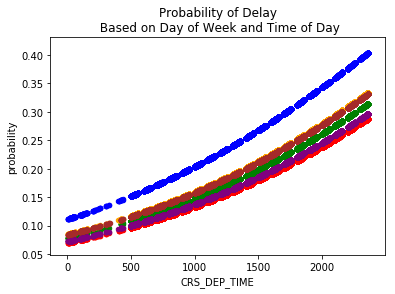

In [38]:
# using matplotlib, but also use seaborn

# Create a plot object and call it ax. This will allow you to tweak the plot's features independently
ax = plt.subplot(111)

# Create a list of colors for our various days_of_week -1
days_by_colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

# Use the enumerate() function to iterate through the list of colors/days
for index, color_ in enumerate(days_by_colors):
    df[df[features[index]] == 1].plot(x='CRS_DEP_TIME', y='probability', kind='scatter',
                                  color = color_, ax=ax)
# Use the ax object
ax.set(title='Probability of Delay\n Based on Day of Week and Time of Day');


# This graph shows: The likelihood of delay increases as the day goes on.

In [40]:
# If you didn't understand what enumerate was doing, print this:
for index, color_ in enumerate(days_by_colors): 
    print(index, color_)
    
### why is there only 6 days noted here? 

(0, 'blue')
(1, 'green')
(2, 'red')
(3, 'purple')
(4, 'orange')
(5, 'brown')


## 11. Visualizing Carrier Performance Over Time
* The features list now will be comprised of the dummy variables from the 'CARRIER' column instead of dummy variables from the 'DAY_OF_WEEK'

In [41]:
# Select feature columns that have 'carrier' in the name:
features = [i for i in df.columns if 'carrier_' in i]

In [42]:
# Add 'CRS_DEP_TIME' to the features list the way we did before:
features += ['CRS_DEP_TIME']

# ONLY RUN ONCE
# ONLY RUN ONCE
# ONLY RUN ONCE

In [43]:
# Instantiate your LogisticRegression model object
model = lm.LogisticRegression()

# Fit your model on the new features and the same target variable 'DEP_DEL15'
# Option 1
        # X = df[features[1:]]
        # y = df['DEP_DEL15']

# Option 2
model.fit(df[features[1:]], df['DEP_DEL15'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
# Add the predicted probabilities to the dataframe that will overwrite the previous probabilities for days of week
df['probability'] = model.predict_proba(df[features[1:]]).T[1]

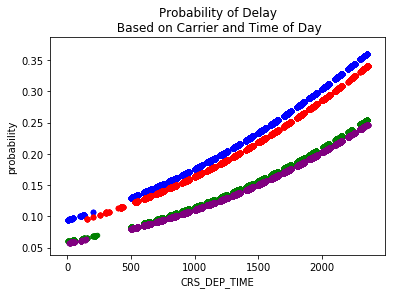

In [45]:
# Plot the probability of delay based on Carrier and time of day:
ax = plt.subplot(111)
carriers_by_colors = ['blue', 'green', 'red', 'purple']
for index, color_ in enumerate(carriers_by_colors):
    df[df[features[index]] == 1].plot(x='CRS_DEP_TIME', y='probability', kind='scatter', color = color_, ax=ax)

# Set the title    
ax.set(title='Probability of Delay\n Based on Carrier and Time of Day');

In [66]:
# If you didn't understand what enumerate was doing, print this:
for index, color_ in enumerate(carriers_by_colors): 
    print(index, color_)

(0, 'blue')
(1, 'green')
(2, 'red')
(3, 'purple')


### 12. Visualize the Probability of NOT Being Delayed, Using the `.predict_proba()` column [0], probability of the target variable = 0!

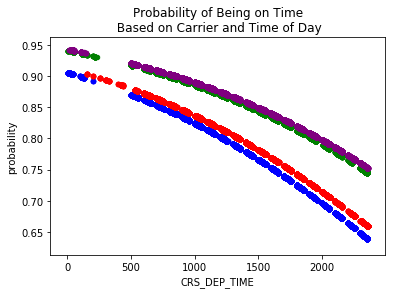

In [46]:
# Set your features columns to be all carriers columns
features = [i for i in df.columns if 'carrier_' in i]

# Add departure time to the features columns
features += ['CRS_DEP_TIME']

# Instantiate your model if you haven't already
model = lm.LogisticRegression()

# Fit your moedl on the new features with y = 'DEP_DEL15' still:
model.fit(df[features[1:]], df['DEP_DEL15'])

# Instead of .T[1] we're now using .T[0] to grab probability of 'DEP_DEL15' == 0
df['probability'] = model.predict_proba(df[features[1:]]).T[0]

# For each carrier, for all samples that were delayed by less than 15 min, 
    # plot the predicted probability of being on time by time of departure: 
ax = plt.subplot(111)
carriers_by_colors = ['blue', 'green', 'red', 'purple']
for index, color_ in enumerate(carriers_by_colors):
    df[df[features[index]] == 1].plot(x='CRS_DEP_TIME', y='probability', kind='scatter', color = color_, ax=ax)

# Set the title
ax.set(title='Probability of Being on Time\n Based on Carrier and Time of Day');

### 13. Visualizing Performance Against Baseline
* We'll use the dummy classifier: learn more here: # http://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html
* Instantiate the model object
* Fit the model
* Create a column of predicted probabilities for probability of having a delay: 'DEP_DEL15' == 1
* Create a column of predicted probabilities for probability of no delay: 'DEP_DEL15' == 0

In [47]:
from sklearn import dummy, metrics

In [48]:
# Instantiate DummyClassifier object: model0
model0 = dummy.DummyClassifier()

# Fit the model based on the same features we had in the last model
model0.fit(df[features[1:]], df['DEP_DEL15'])

# Add column of Predict probabilities where 'DEP_DEL15' == 1
df['probability_0'] = model0.predict_proba(df[features[1:]]).T[1]

# Instantiate a LogisticRegression model object: model1
model1 = lm.LogisticRegression()

# Fit your model
model.fit(df[features[1:]], df['DEP_DEL15'])

# Add another column of Predict probabilities where 'DEP_DEL15' == 0
df['probability_1'] = model.predict_proba(df[features[1:]]).T[1] 

In [49]:
df.shape

(458311, 39)

### 14. Plot the ROC (Receiver Operating Characteristic) Curve

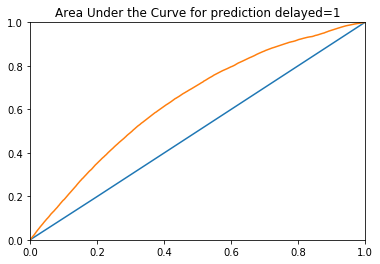

In [50]:
ax = plt.subplot(111)

# Plot out the 50-50 line
vals = metrics.roc_curve(df.DEP_DEL15, df.probability_0)
ax.plot(vals[0], vals[1])
# Plot out the precision-recall curve
vals = metrics.roc_curve(df.DEP_DEL15, df.probability_1)
ax.plot(vals[0], vals[1])

ax.set(title='Area Under the Curve for prediction delayed=1', 
       ylabel='', xlabel='', xlim=(0, 1), ylim=(0, 1));

### 15. Visualizing Precision / Recall with cleaner code

In [67]:
# Repeat basic steps like above
model0 = dummy.DummyClassifier()
model0.fit(df[features[1:]], df.DEP_DEL15)
df['probability_0'] = model0.predict_proba(df[features[1:]]).T[1]

model = lm.LogisticRegression()
model.fit(df[features[1:]], df.DEP_DEL15)
df['probability_1'] = model.predict_proba(df[features[1:]]).T[1]

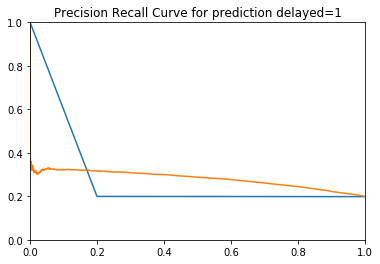

In [68]:
# Create the plot!
ax = plt.subplot(111)
for i in range(2):
    vals = metrics.precision_recall_curve(df.DEP_DEL15, df['probability_' + str(i)])
    ax.plot(vals[1], vals[0])

ax.set(title='Precision Recall Curve for prediction delayed=1',
       ylabel='', xlabel='',xlim=(0, 1), ylim=(0, 1));